# Numerical Variables

In this first notebook, we will discuss numerical variables, which is the first lecture of section 03 of the feature engineering course. We will start by briefly defining what a numerical variable is and dividing it into two groups: discrete and continuous.

## Variable - Numerical and Categorical

In general, we can define a variable as a quantity that can be measured or counted. We named it a "variable" because this quantity can assume different values that vary in different ways. There are infinitely many examples of what a variable can be:
- Age ($10$, $12$, $20$, etc);
- Gender (male, female);
- Income ($\textrm{R\$}\:2500$, $\textrm{R\$}\:9750$, etc)
- Country Birth (Brazil, Argentina, USA, Japan, etc)
- Taxi Fares ($\textrm{USD}\:12,00$, $\textrm{USD}\:30,50$, etc)

Usually, a variable can be classified in two groups:
1) **Numerical variables**
2) **Categorical variables**

### 1) Numerical Variables

Numerical variables are variable that can be represented by numbers. These variables can be splitted in two groups:
- Continuous Variables
- Discrete Variables

### Continuous Variables

A numerical variable is said to be a **continuous variable** if it takes a continuous range of possible values. For example, when we deal with income variables, their values can, in principle, assume any numerical value as $\textrm{R\$}\:2500,65$, $\textrm{R\$} 7689,90$, etc. Another common type of numerical value is time. When we are talking about time, this variable can assume any value like $3.5\textrm{s}$, $8.9\textrm{s}$, etc.

### Discrete Variables

A numerical variable is said to be a **discrete variable** if it takes a discrete range of possible values. For example, if we are discussing the age of a person, this value can be $10$, $18$, $45$, and so on. Any quantity that can be counted - i.e., represented by integer numbers - is a discrete numerical variable. There are also discrete variables that assume a finite number of possible values like binary variables ($0$ or $1$ - for example, default or not default in credit risk scenarios). 

=============================================================================================

## Hands-On: Peer-to-peer lending dataset

Let us start getting our hands dirty and analyze the concepts discussed above in a dataset. This is a toy dataset created by Soledad Galli for this course.

In [1]:
# importing basic libraries
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
# loading the data 
data_path = '../datasets/loan.csv'
lending_data = pd.read_csv(data_path)
lending_data.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN


The definition of these set of variables are:
- `disbursed_amount`: loan amount given to the borrower
- `interest`: interest rate
- `income`: annual income
- `number_open_accounts`: open accounts
- `number_credit_lines_12`: accounts opened in the last 12 months
- `target`: loan status (paid or being paid = 1, defaulted = 0)

### a) Continuous Variables

Let us take a look at `disbursed_amount` variable. This is a continuous one. One can see the continuity by looking at the histogram of this variable:

Text(0, 0.5, 'Number of Loans')

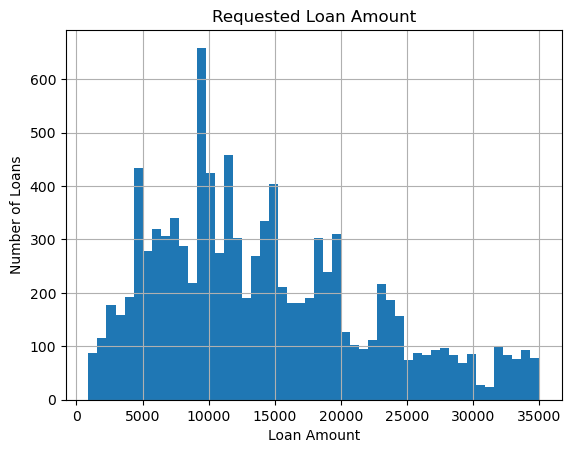

In [3]:
# histogram of disbursed_amount
fig = lending_data['disbursed_amount'].hist(bins=50)

fig.set_title('Requested Loan Amount')
fig.set_xlabel('Loan Amount')
fig.set_ylabel('Number of Loans')

The variable assumes values accross the entire range. This is a characteristic of a continuous variable. Another way to see this is through it values array:

In [4]:
# array of values - disbursed amount variable
lending_data.disbursed_amount.unique()

array([23201.5 ,  7425.  , 11150.  , ...,  6279.  , 12894.75, 25584.  ])

Another continuous variable is `interest` - which is the loan interest rate. Let us see its histogram distribution:

Text(0, 0.5, 'Number of Loans')

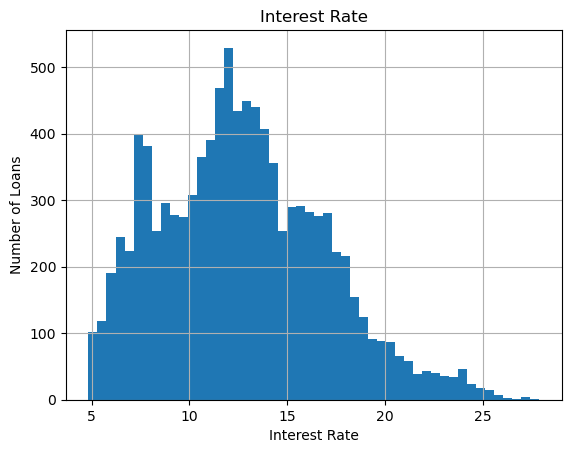

In [5]:
# histogram - interest variable 
fig = lending_data['interest'].hist(bins=50)

fig.set_title('Interest Rate')
fig.set_xlabel('Interest Rate')
fig.set_ylabel('Number of Loans')

Again it is possible to see that it is a continuous variable whose values accross the entire range. These values comprise the interest rate charged to the borrower.

In [6]:
# array of interest rate 
lending_data.interest.unique()

array([15.484 , 11.2032,  8.51  , ..., 12.9195, 11.2332, 11.0019])

Lastly, we will see the `income` feature. Of course income is a continuous variable once it can assume, in principle, any value. 

Text(0, 0.5, 'Number of Customers')

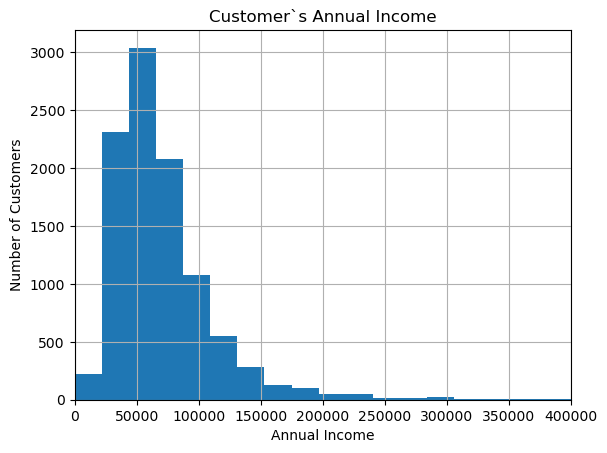

In [7]:
# histogram - income variable
fig = lending_data['income'].hist(bins=100)

# we set a x limit to better visualization
fig.set_xlim(0, 400000)

fig.set_title('Customer`s Annual Income')
fig.set_xlabel('Annual Income')
fig.set_ylabel('Number of Customers')

As you can see, most annual salaries are between $\textrm{USD}\:30\textrm{K}$ and $\textrm{USD}\:100\textrm{K}$ per year, and only a small part are above $\textrm{USD}\:125\textrm{K}$ per year.

### b) Discrete Variables

For discrete variables, let us start by looking at the `number_open_accounts`, which represents an integer number of open accounts. It is a discrete variable, as it is impossible to have $1.5$ account, for example. 

In [8]:
# array of number_open_accounts feature
lending_data['number_open_accounts'].unique()

array([ 4., 13.,  8., 20., 14.,  5.,  9., 18., 16., 17., 12., 15.,  6.,
       10., 11.,  7., 21., 19., 26.,  2., 22., 27., 23., 25., 24., 28.,
        3., 30., 41., 32., 33., 31., 29., 37., 49., 34., 35., 38.,  1.,
       36., 42., 47., 40., 44., 43.])

As we have done for continuous variables, we can make an histogram for this variable to see its distribution:

Text(0, 0.5, 'Number of Customers')

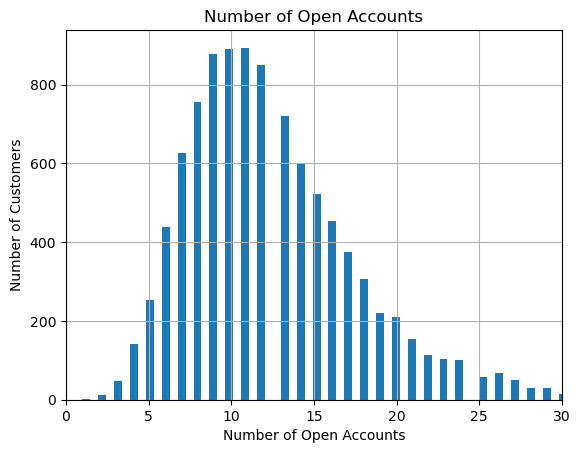

In [9]:
# histogram of number_open_accounts
fig = lending_data['number_open_accounts'].hist(bins=100)

# setting a x limit to better visualization
fig.set_xlim(0, 30)

# title and axis labels
fig.set_title('Number of Open Accounts')
fig.set_xlabel('Number of Open Accounts')
fig.set_ylabel('Number of Customers')

It is clear the difference in the histograms for discrete and continuous variables. For discrete ones, not all values in the range are represented and the histogram shows this broken form. It occurs exactly because the variables assume only discrete values.

Now, it is interesting to looking at another discrete variable that is called `number_credit_lines_12`, which means **number of installment account opened in the previous 12 months**. Installment accounts represent accounts that have a defined length and quantity of repayments to be completed. For example, a car or a student loan are typical examples.

In [10]:
# array of number_credit_lines_12
lending_data['number_credit_lines_12'].unique()

array([nan,  2.,  4.,  1.,  0.,  3.,  5.,  6.])

Text(0, 0.5, 'Number of Borrowers')

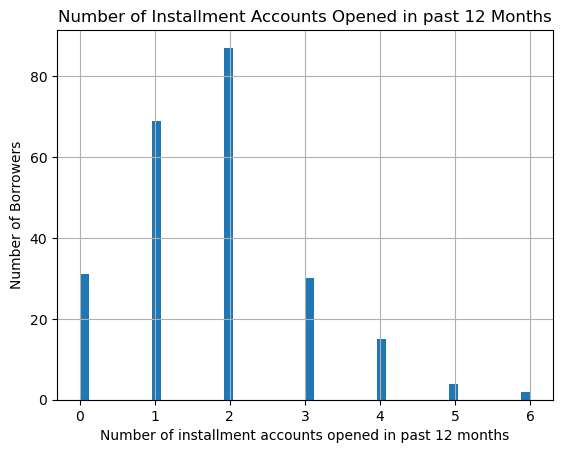

In [11]:
# histogram of number_credit_lines_12
fig = lending_data['number_credit_lines_12'].hist(bins=50)
fig.set_title('Number of Installment Accounts Opened in past 12 Months')
fig.set_xlabel('Number of installment accounts opened in past 12 months')
fig.set_ylabel('Number of Borrowers')

Most part of the borrowers have only $1$ or $2$ installment open accounts. Only a few of them have more than two. It is interesting to note that, despite of both `number_open_accounts` and `number_credit_lines_12` are about open accounts, the range of values are totally different because the nature of each account. 

Lastly we will look at a binary variable.

### Binary Variables

Binary variables are a particular case of discrete variables where they can assume only two possible values. In our case, `target` is a binary variable and it can assume only $0$ or $1$ value.

In [12]:
# array - target feature
lending_data['target'].unique()

array([0, 1])

Text(0, 0.5, 'Number of Loans')

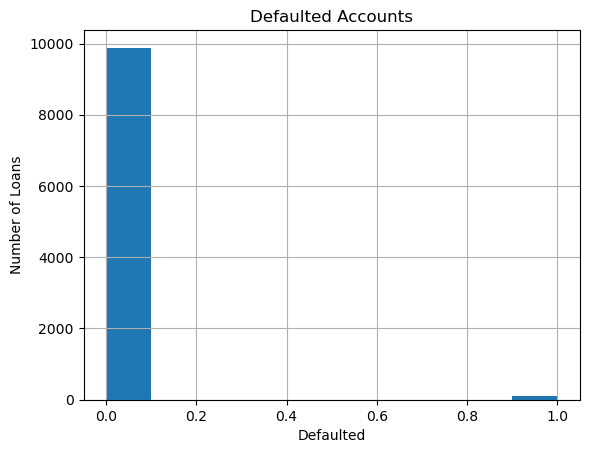

In [13]:
# histogram - target feature
fig = lending_data['target'].hist()
fig.set_title('Defaulted Accounts')
fig.set_xlabel('Defaulted')
fig.set_ylabel('Number of Loans')

As we expect, the most part of values are concentrated in $0$ - only a few accounts are defaulted. It is a typical unbalanced problem in data science!